In [1]:
# Input Labels
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('insurence_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [8]:
# Scaling Age Features 
df1 = df.copy()
df1['age'] = df.age / 100

Split train and test set

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df1[ ['age' , 'affordibility'] ] , df1['bought_insurance'] , test_size=0.2 ,random_state=25 )

# Build Model with Tenserflow

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(  1, input_shape = (2 , )  , activation='sigmoid' ,  kernel_initializer='ones', bias_initializer='zeros')
] )

model.compile( 
              optimizer='sgd',
              loss ='binary_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train , y_train , epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 665ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.7107 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.7101 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7088 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7081 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.7075 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.7069 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7063 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7057 - accuracy: 0.5000
Epoch 11

In [12]:
model.evaluate(x_test , y_test)

1/1 [==============================] - 0s 80ms/step - loss: 0.5505 - accuracy: 0.6667


[0.5504843592643738, 0.6666666865348816]

In [ ]:
y_pred = model.predict(x_test)
y_pred 

In [ ]:
y_test

In [13]:
model.get_weights()

[array([[1.3455315],
        [1.0348842]], dtype=float32),
 array([-1.1110219], dtype=float32)]

# Stochastisc Gradient function

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [14]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))
sigmoid(18)

0.9999999847700205

In [15]:
# loss function
# loss = 
def binary_crossentropy(y_true , y_pred):
    
    near_to_zero = 1e-15
    near_to_one = 1 -  1e-15
    
    y_pred = np.array([ near_to_zero if x == 0 else min(x , near_to_one)  for x in y_pred])
    y_true = np.array(y_true)
    
    return -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
    
y_true = [0]
y_pred = [0.7720635494267837]

binary_crossentropy(y_true, y_pred)


1.4786884144349521

In [17]:
def accuracy_func(y_true , y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    
    total_pred = len(y_pred)
    correct_pred = sum( [ 1 if true == pred else 0 for true,pred in zip(y_true,y_pred_binary)] )
    
    return correct_pred / total_pred 

accuracy_func( [0,1,0,1,1]  , [ 0.32 , 0.49 , 0.11 , 0.67, 0.99])
# correct = 

0.8

In [52]:

import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

4

In [46]:
np.dot( np.array([100,200]) , np.array([[ 1, 10], [ 2, 20]]).T )


array([2100, 4200])

In [93]:

def stochastic_GD(x_train  ,y_train,epoches ,learning_rate=0.5, loss_threshold = 0.4):
    
    ( total_samples , total_features) = x_train.shape
    
    # initialize weights and bias
    weights = np.ones(total_features)
    bias = 0 

    cost_list = []
    epoch_list = []
    accuracy_list = []
    
    for i in range(1 , epoches+1):
        
        random_sample_index = random.randint(0,total_samples-1) # random index from traing sample
        
        x_sample = np.array( [ x_train.iloc[ random_sample_index] ] )
        y_sample = np.array([ y_train.iloc[random_sample_index] ])

        
        # calculated weighted sum of age and affordiblity features
        weighted_sum =   np.dot( weights , x_sample.T  ) + bias
        
        
        # convert weighted_sum to output using actvation function
        y_pred = sigmoid(weighted_sum)
        
        #calculating the loss btw the actual and predicted using loss function
        loss = binary_crossentropy( y_sample , y_pred)
        accuracy = accuracy_func(y_sample , y_pred) 
        
        
        d_weights = -(np.dot( x_sample.T , (y_pred - y_sample))) *  (2/ total_samples)
        d_bias = -(2/total_samples)*(  y_pred - y_sample)
        
        # adjust weights and bias to reduce the loss with help of learning_rate , derivated weights
        # new_w = w * learning_rate - dw
        
        weights = weights - learning_rate  * d_weights
        bias = bias - learning_rate  * d_bias

        
        if i%100==0:
            print (f'Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} , accuracy:{accuracy}')
            cost_list.append(loss)
            epoch_list.append(i)
            accuracy_list.append(accuracy)
            
        if loss<=0.001:
                print (f'Final - Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} ,  accuracy:{accuracy}')
                break
            
    return weights, bias ,cost_list , accuracy_list , epoch_list
        
(weights, bias ,cost_list , accuracy_list , epoch_list) = stochastic_GD(x_train , y_train ,epoches = 1000 )


Epoch:100, weights : [1.47712645 1.72614405],  bias:[1.55294543], loss:2.022292419914059 , accuracy:0.0
Final - Epoch:173, weights : [2.02526012 2.53034371],  bias:[3.37882419], loss:0.0007729475108871213 ,  accuracy:1.0


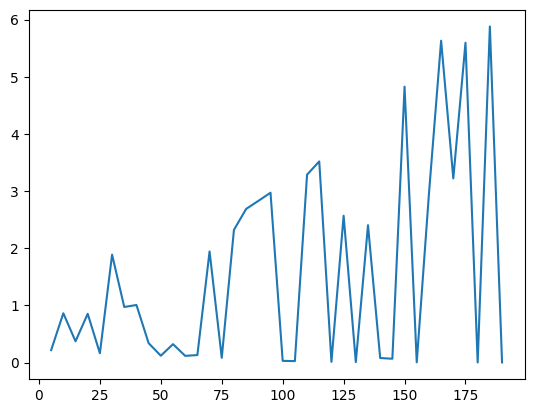

In [92]:
plt.plot( epoch_list ,  cost_list )